# Pre-processing of CIC-IDS-2017 Dataset

Pre-processing CICIDS 2017 dataset, cleaning and handling values discrepancies. All four CSV files are combined and processed before exporting it to combined CSV file.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

%matplotlib inline

In [3]:
## Reading all files of CICIDS 2017 Dataset

output_file = "./CICIDS2017_preprocessed.csv"
label_folder = "./GeneratedLabelledFlows/TrafficLabelling"
df1 = pd.read_csv(label_folder + "/Monday-WorkingHours.pcap_ISCX.csv")
df2 = pd.read_csv(label_folder + "/Tuesday-WorkingHours.pcap_ISCX.csv")
df3 = pd.read_csv(label_folder + "/Wednesday-workingHours.pcap_ISCX.csv")
df4 = pd.read_csv(label_folder + "/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv")
df5 = pd.read_csv(
    label_folder + "/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv",
    encoding="cp1252",
    low_memory=False,
)
df6 = pd.read_csv(label_folder + "/Friday-WorkingHours-Morning.pcap_ISCX.csv")
df7 = pd.read_csv(label_folder + "/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv")
df8 = pd.read_csv(label_folder + "/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")

In [4]:
df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8], ignore_index=True)
df.shape

(3119345, 85)

In [5]:
df.columns

Index(['Flow ID', ' Source IP', ' Source Port', ' Destination IP',
       ' Destination Port', ' Protocol', ' Timestamp', ' Flow Duration',
       ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Length', ' Max Pa

In [6]:
df.columns = df.columns.str.strip()
## Duplicate Column; Removal
df.drop(columns=["Fwd Header Length.1"], inplace=True)
df.shape

(3119345, 84)

In [7]:
df[pd.isnull(df["Flow ID"])]

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
2127498,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2127499,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2127500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2127501,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2127502,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2416095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2416096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2416097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2416098,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df = df.drop(df[pd.isnull(df["Flow ID"])].index)
df.shape

(2830743, 84)

In [9]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)
df.shape

(2827876, 84)

In [10]:
df.drop_duplicates(inplace=True)
df.shape

(2827677, 84)

In [11]:
df.Label.unique()

array(['BENIGN', 'FTP-Patator', 'SSH-Patator', 'DoS slowloris',
       'DoS Slowhttptest', 'DoS Hulk', 'DoS GoldenEye', 'Heartbleed',
       'Infiltration', 'Web Attack – Brute Force', 'Web Attack – XSS',
       'Web Attack – Sql Injection', 'Bot', 'PortScan', 'DDoS'],
      dtype=object)

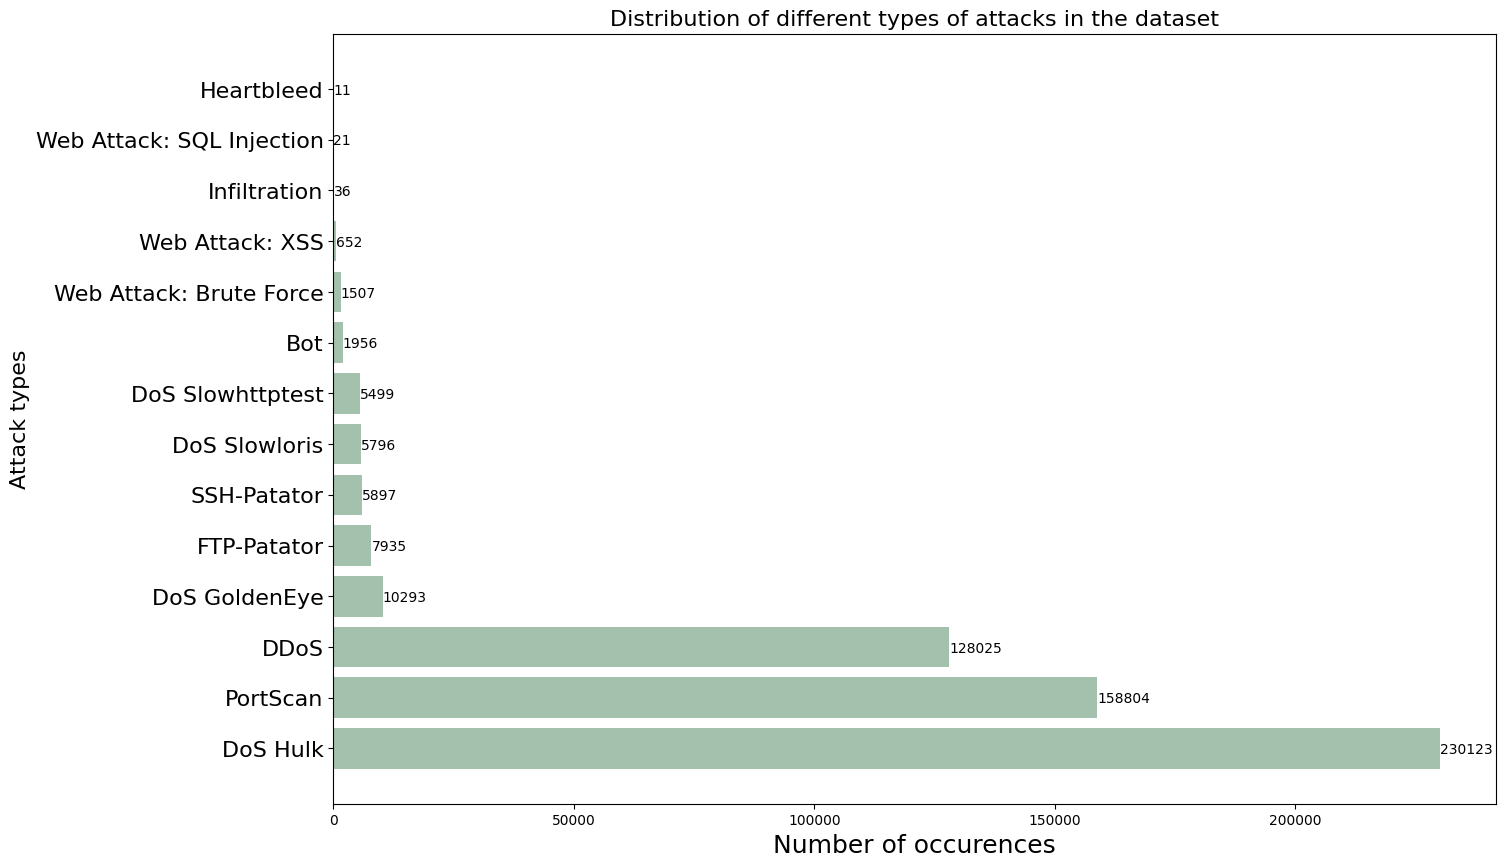

In [12]:
plt.figure(figsize=(15, 10))

attack = (
    "DoS Hulk",
    "PortScan",
    "DDoS",
    "DoS GoldenEye",
    "FTP-Patator",
    "SSH-Patator",
    "DoS Slowloris",
    "DoS Slowhttptest",
    "Bot",
    "Web Attack: Brute Force",
    "Web Attack: XSS",
    "Infiltration",
    "Web Attack: SQL Injection",
    "Heartbleed",
)
y_pos = np.arange(len(attack))
amount = df["Label"].value_counts()[1:]
plt.barh(y_pos, amount, align="center", color="#a3c1ad")
plt.yticks(y_pos, attack, fontsize=16)
plt.title("Distribution of different types of attacks in the dataset", fontsize=16)
plt.xlabel("Number of occurences", fontsize=18)
plt.ylabel("Attack types", fontsize=16)
for i, v in enumerate(amount):
    plt.text(v + 3, i - 0.1, str(v))

plt.show()

In [13]:
df.shape

(2827677, 84)

In [14]:
Path(output_file).parent.mkdir(parents=True, exist_ok=True)
df.to_csv(output_file, index=False)

In [15]:
df_p = pd.read_csv(output_file)

In [16]:
df_p.Label.value_counts()

BENIGN                        2271122
DoS Hulk                       230123
PortScan                       158804
DDoS                           128025
DoS GoldenEye                   10293
FTP-Patator                      7935
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1956
Web Attack – Brute Force         1507
Web Attack – XSS                  652
Infiltration                       36
Web Attack – Sql Injection         21
Heartbleed                         11
Name: Label, dtype: int64